# Project

Dans les TD précédents, nous avons vu comment appliquer différents algorithmes dans un ensemble de données audio. Cependant, il est important de préciser que ces algorithmes ne sont pas conçus pour un seul type de données. Pour cette raison, le but du projet est de trouver le meilleur algorithme pour classer les images.

CIFAR est un acronyme qui signifie Canadian Institute For Advanced Research et l'ensemble de données CIFAR-10 a été développé par les chercheurs de l'institut CIFAR.

L'ensemble de données est composé de 60 000 photographies couleur 32×32 pixels d'objets de 10 classes, tels que des grenouilles, des oiseaux, des chats, des navires, etc. Les étiquettes des classes et leurs valeurs entières standard associées sont énumérées ci-dessous.

    0 : avion
    1 : automobile
    2 : oiseau
    3 : chat
    4 : cerfs
    5 : chien
    6 : grenouille
    7 : cheval
    8 : navire
    9 : camion

Ce sont de très petites images, beaucoup plus petites qu'une photographie typique, et l'ensemble de données était destiné à la recherche sur la vision par ordinateur.

Le CIFAR-10 est un ensemble de données bien compris et largement utilisé pour l'étalonnage des algorithmes de vision par ordinateur dans le domaine de l'apprentissage machine. Le problème est "résolu". Il est relativement simple d'atteindre une précision de classification de 80 %.


170500096/170498071 [==============================] - 11s 0us/step
Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(5000, 32, 32, 3), y=(5000, 1)
Val: X=(5000, 32, 32, 3), y=(5000, 1)


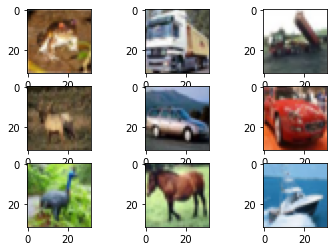

In [3]:
from matplotlib import pyplot
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test)
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
print('Val: X=%s, y=%s' % (X_val.shape, y_val.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

Les fonctions suivantes sont utiles pour traiter les images:

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

image = X_train[2000]

image_resize = cv2.resize(image, (64, 64)) ## redimensionner une image en 32x32

cv2_imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB)) ## voir une image

image_flatten = image.flatten() ##Transformer l'image (hauteur, largeur, canaux) en un tableau unidimensionnel.

X_train_flatten = X_train.reshape(X_train.shape[0], -1) ## Transformer le train set (nombre_images, hauteur, largeur, canaux) en un tableau unidimensionnel (nombre_images, hauteur*largeur*canaux).

In [4]:
# normalize to range 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

Le but est d'utiliser tous les algorithmes que nous avons vus (KNN, réseaux neuronaux et CNN) pour trouver les meilleurs résultats.

Vous  pouvez utiliser tous les codes que nous avons utilisés dans les TD précédents.

In [5]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)[:500] ## Prendre les premiers 500 images
X_val_flatten = X_val.reshape(X_val.shape[0], -1)[:500]

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)[:500] ## Prendre les premiers 500 classes
y_val = y_val.reshape(-1)[:500]

print(X_train_flatten.shape, y_train.shape)
print(X_test_flatten.shape, y_test.shape)
print(X_val_flatten.shape, y_val.shape)

(50000, 3072) (50000,)
(500, 3072) (500,)
(500, 3072) (500,)


In [6]:
## Images en gris

import cv2
import numpy as np
X_train_gray = np.zeros((X_train.shape[0], 32, 32))
X_test_gray = np.zeros((X_test.shape[0], 32, 32))
X_val_gray = np.zeros((X_val.shape[0], 32, 32))
for idx, img in enumerate(X_train):
  X_train_gray[idx] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for idx, img in enumerate(X_test):
  X_test_gray[idx] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

for idx, img in enumerate(X_val):
  X_val_gray[idx] = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

X_train_gray_flatten = X_train_gray.reshape(X_train_gray.shape[0], -1)
X_test_gray_flatten = X_test_gray.reshape(X_test_gray.shape[0], -1)[:500]
X_val_gray_flatten = X_val_gray.reshape(X_val_gray.shape[0], -1)[:500]

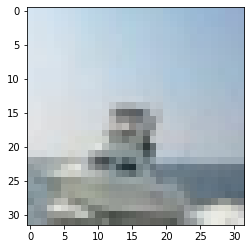

In [7]:
pyplot.imshow(X_train[100])


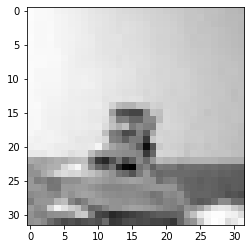

In [8]:
pyplot.imshow(X_train_gray[100], cmap='gray')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flatten, y_train)

In [ ]:
knn.score(X_test_flatten, y_test)

On a essayé avoir 3 couches parce que ....

# Sauvegarde et utilisation de votre modèle.


Après avoir obtenu le meilleur résultat avec votre réseau, vous pouvez stocker les poids qu'il a appris. 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras

y_train_cat = tf.keras.utils.to_categorical(y_train, 10)[:500]
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)[:500]
y_val_cat = tf.keras.utils.to_categorical(y_val, 10)[:500]

model = Sequential()
model.add(Dense(128, input_dim=1024, activation='relu'))
model.add(Dense(10, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Fit the model
model.fit(X_train_gray_flatten, y_train_cat, epochs=10, batch_size=64)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("weights.h5")
print("Saved model to disk")

Nous pouvons maintenant lire le modèle et les poids du réseau que nous avons formé auparavant

In [ ]:
from keras.models import model_from_json

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("weights.h5")
print("Loaded model from disk")

Et maintenant, nous pouvons vérifier les résultats avec l'image que vous voulez.

Probabillity Prediction [[0.10170069 0.11701978 0.0921304  0.09321278 0.10003533 0.08951925
  0.10339863 0.1005924  0.09512416 0.10726659]]
Class prediction 1
Real class  8


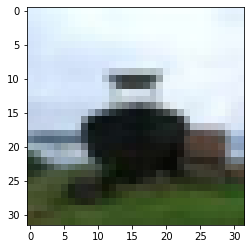

In [ ]:
idx_image_to_test = 200

pyplot.imshow(X_test[idx_image_to_test])

image_to_test = X_test_gray_flatten[idx_image_to_test].reshape(1,-1)

prediction = loaded_model.predict(image_to_test)

print("Probabillity Prediction", prediction) ## Probabilty of each class
print("Class prediction", np.argmax(prediction)) ## Class (0 : avion, 1 : automobile, 2 : oiseau, 3 : chat, 4 : cerfs, 5 : chien, 6 : grenouille, 7 : cheval, 8 : navire, 9 : camion)
print("Real class ", y_test[idx_image_to_test])